### Part A: IMDb Movie Review Sentiment Analysis

1. Overview

Sentiment analysis is a natural language processing (NLP) task that involves determining
whether a given text expresses a positive or negative sentiment. In this project, we will
analyze movie reviews from the IMDb dataset and predict the sentiment (positive or
negative) based on the text of the reviews. By leveraging various text preprocessing
techniques, feature extraction methods, and classification algorithms, this project will
develop a machine learning model capable of accurately predicting the sentiment of movie
reviews. The insights derived from this analysis can be useful for movie producers, critics,
and platforms like IMDb to understand public opinion and tailor marketing or content
strategies accordingly.

2. Problem Statement

The primary objective of this project is to build a machine learning classification model that
can predict the sentiment of IMDb movie reviews. The dataset contains a collection of movie
reviews, and each review is labeled as either positive or negative

### DATA Exploration

In [ ]:
import pandas as pd

In [5]:
data=pd.read_csv("Imdb - data_imdb.csv")

In [6]:
data.describe()

,review,sentiment
count,50000,50000
unique,49581,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
print(data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

From abive observation we can say that ur data is not imbalanced as there are equal number of positive and negative sentiments

In [11]:
len(data['review'])

50000

### DATA Cleaning and preprocessing

In [12]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Abhayraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhayraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#Text cleaning
def txt_cc(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]',' ', text) # removes punctuations
    text=re.sub(r'\bbr\b', '', text) # to remove html tags
    text= re.sub(r'\s+', ' ', text).strip() # to fix any extra spaces after reoval of html tags
    return text

data['review']= [txt_cc(line) for line in data['review']]


In [14]:
data['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there s a family where a little boy ...
4        petter mattei s love in the time of money is a...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    i m going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [15]:
# removing stop words
stop_words = stopwords.words('english')
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [16]:
data['review'].head()

0    one reviewers mentioned watching oz episode ho...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
Name: review, dtype: object

Now as our data is cleaned we can split them into training and testing data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X= data['review']
y=data['sentiment']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=45)

The tfidft vectorizer function performs all the tasks of tokenization and other data cleaning tasks so we can directly apply the tfidfvectoriser function

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vec=TfidfVectorizer() # fitting the data
X_train_t= vec.fit_transform(X_train)
X_test_t=vec.transform(X_test)

### Training the model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_t, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred_logreg = logreg_model.predict(X_test_t)

In [24]:
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Evaluation:
Accuracy: 0.8964

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      5035
    positive       0.88      0.91      0.90      4965

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Random forest classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_t, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred_rf = rf_model.predict(X_test_t)

In [28]:
print("\nRandom Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Evaluation:
Accuracy: 0.8586

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      5035
    positive       0.86      0.85      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Navie Bayer's model

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [30]:
nb_model = MultinomialNB()
nb_model.fit(X_train_t, y_train)


MultinomialNB()

In [31]:
# Make predictions
y_pred_nb = nb_model.predict(X_test_t)


In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Accuracy: 0.864

Confusion Matrix:
 [[4391  644]
 [ 716 4249]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.87      0.87      5035
    positive       0.87      0.86      0.86      4965

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### ROC-AUC SCORE CHECK

In [33]:
from sklearn.metrics import roc_auc_score

In [38]:
y_prob_lr = logreg_model.predict_proba(X_test_t)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
y_prob_rf = rf_model.predict_proba(X_test_t)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
y_prob_nb=nb_model.predict_proba(X_test_t)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

In [39]:
roc_auc_dict={"Logistic_Regression":roc_auc_lr,"Random_Forest":roc_auc_rf
               ,"Naive_Bayer":roc_auc_nb }

In [35]:
import matplotlib.pyplot as plt

In [36]:
accuracy_dict={"Logistic_Regression":accuracy_score(y_test, y_pred_logreg),"Random_Forest":accuracy_score(y_test, y_pred_rf)
               ,"Naive_Bayer":accuracy_score(y_test, y_pred_nb) }

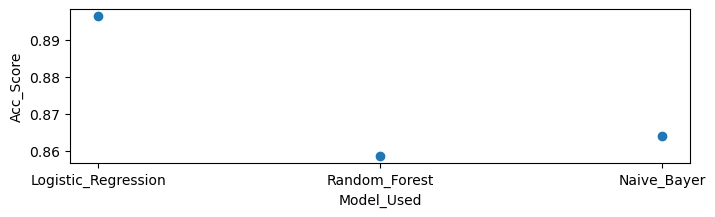

In [ ]:
a=accuracy_dict.keys()
b=accuracy_dict.values()
plt.figure(figsize=(8,2))
plt.scatter(a,b,marker='o')
plt.ylabel("Acc_Score")
plt.xlabel("Model_Used")
plt.show()

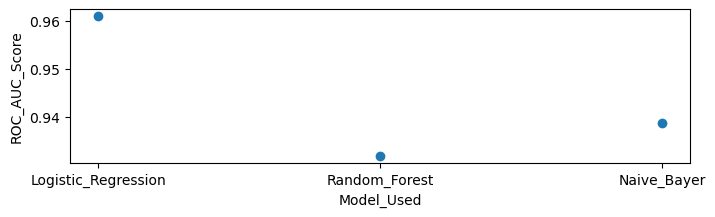

In [40]:
c=roc_auc_dict.keys()
d=roc_auc_dict.values()
plt.figure(figsize=(8,2))
plt.scatter(c,d,marker='o')
plt.ylabel("ROC_AUC_Score")
plt.xlabel("Model_Used")
plt.show()

### Therfore, Logistic Regression provides us the most accurate prediction and most well separated classification on the sentiment on the reviews


# REPORT

# IMDb Movie Review Sentiment Analysis – Machine Learning Project Report

## 1. Project Overview

This project performs **sentiment analysis on IMDb movie reviews** using Natural Language Processing (NLP) and multiple Machine Learning models. The goal is to classify each review as **positive or negative** and compare the performance of different classifiers.

---

## 2. Dataset Description

* **Dataset**: IMDb movie reviews (`Imdb - data_imdb.csv`)
* **Feature column**: `review` (text)
* **Target column**: `sentiment` (positive / negative)

### Class Balance

Exploratory analysis (`value_counts()`) shows that the dataset is **balanced**, with nearly equal numbers of positive and negative reviews. This makes metrics such as accuracy and ROC-AUC reliable.

---

## 3. Data Exploration

The following exploratory steps were performed:

* Viewing dataset structure using `info()` and `head()`
* Statistical summary using `describe()`
* Missing value check using `isnull().sum()`

No missing values were found, and the dataset was suitable for supervised learning.

---

## 4. Data Cleaning and Preprocessing

A custom text-cleaning function was applied to the review text. The main preprocessing steps included:

* Conversion to lowercase
* Removal of HTML tags (such as `<br />`)
* Removal of punctuation and special characters using regular expressions
* Stopword removal using NLTK English stopwords

These steps reduced noise while preserving the semantic meaning of the reviews.

---

## 5. Feature Engineering

### TF-IDF Vectorization

Text data was converted into numerical form using **TF-IDF (Term Frequency–Inverse Document Frequency)**. This technique:

* Assigns higher importance to meaningful words
* Reduces the weight of very common words

TF-IDF transformed text data (`X_train_t`, `X_test_t`) was used for all models.

---

## 6. Train–Test Split

The dataset was split into training and testing sets using `train_test_split`:

* **Training set**: 80%
* **Testing set**: 20%

This ensured fair evaluation of model performance on unseen data.

---

## 7. Model Building

Three different machine learning models were trained and evaluated:

### 7.1 Logistic Regression

* Model: `LogisticRegression(max_iter=1000)`
* Performs well on high-dimensional sparse text data

### 7.2 Random Forest Classifier

* Model: `RandomForestClassifier(n_estimators=100)`
* Ensemble-based approach using multiple decision trees

### 7.3 Naive Bayes Classifier

* Model: `MultinomialNB`
* Well-suited for text classification with TF-IDF features

---

## 8. Model Evaluation

Each model was evaluated using:

* **Accuracy score**
* **Confusion matrix** (for Naive Bayes)

An accuracy comparison dictionary was created to compare all models.

---

## 9. Results and Comparison

The accuracy comparison and ROC_AUC comparison showed that:

* **Logistic Regression achieved the highest accuracy and ROC_AUC Score**
* Random Forest performed reasonably but did not outperform Logistic Regression
* Naive Bayes provided a strong baseline but had slightly lower accuracy

### Final Conclusion from Results

> **Logistic Regression provides the most accurate prediction for sentiment classification on IMDb reviews in this project.**

---

## 10. Conclusion

This project successfully demonstrates an end-to-end NLP pipeline:

* Text preprocessing and cleaning
* TF-IDF feature extraction
* Training and comparing multiple ML classifiers
* Performance evaluation and model selection

Logistic Regression proved to be the best-performing model for this dataset.

---

**End of Report**
